In [3]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import StrMethodFormatter
import math
import sys
import copy
import helpers 
import dpautils

from scipy import stats
from array import array
from operator import xor

np.set_printoptions(threshold=sys.maxsize)

In [4]:
N=20
std=0.5
number_of_experiments=500
Ns=list(range(1,N,1))
TK1_0=[0,1,2,3] # 3x traces
TK1_1=[4,5,6,7]
TK1_2_unsorted=[0,1,2,3] # 3x traces
Tk1_3_unsorted=[8,9,10,11]

keys=np.random.randint(2147483647, 9223372036854775807, size=number_of_experiments, dtype=np.int64) 

In [5]:
P=helpers.gen_plaintexts(N)

# Precompute intermediate values and power traces for different keys

intermediate_values=[]
for key in keys:
    val=dpautils.compute_intemediate_values(P,int(keys[0]))
    interm_values=val[0]
    clear_text=val[1]
    TK1=val[2].A1
    T = dpautils.gen_traces(interm_values, std)
    intermediate_values.append([interm_values,clear_text,TK1,T])

In [4]:
simultanous_success_rate_pr_n=[]
for n in Ns:
    probs=[]
    
    for i,key in enumerate(keys):
        clear_text = intermediate_values[i][1]
        TK1 = intermediate_values[i][2]
        T = intermediate_values[i][3]
        
        TK1_0_guess=[]
        
        # Attack TK1 nibble i (first row of TK1)
        for i in range(4): 
            t=T[:n]
            ct=clear_text[:n]
            nibble_guess=dpautils.simultanous_atk(t,ct,i)
            TK1_0_guess.append(nibble_guess)
            
        #_____SUCCESS/FAIL_________________
        if(np.array_equal(TK1[0:4],TK1_0_guess)):
            probs.append(1)
        else:
            probs.append(0)
    simultanous_success_rate_pr_n.append(np.average(probs))

KeyboardInterrupt: 

In [5]:
individual_attack_success_rate_pr_n=[]
Ns=list(range(1,N,1))
for n in Ns:
    probs=[]
    
    for i,key in enumerate(keys):
        clear_text = intermediate_values[i][1]
        TK1 = intermediate_values[i][2]
        T = intermediate_values[i][3]
        TK1_0_guess=[]
        
        # Attack TK1 nibble i (first row of TK1)
        for i in range(4): 
            t=T[:n]
            ct=clear_text[:n]
            nibble_guess=dpautils.individual_atk(t,ct,i)
            TK1_0_guess.append(nibble_guess)
            
        #_____SUCCESS/FAIL_________________
        if(np.array_equal(TK1[0:4],TK1_0_guess)):
            probs.append(1)
        else:
            probs.append(0)
    individual_attack_success_rate_pr_n.append(np.average(probs))

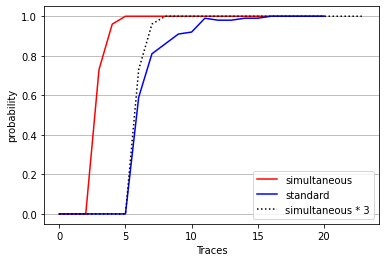

In [14]:
simultanous_success_rate_pr_n.insert(0,0.0)
individual_attack_success_rate_pr_n.insert(0,0.0)
m=copy.copy(simultanous_success_rate_pr_n)
plt.figure()
plt.ylabel('probability')
plt.xlabel('Traces')
plt.plot(np.array(simultanous_success_rate_pr_n), label="simultaneous", c="red")
plt.plot(np.array(individual_attack_success_rate_pr_n), label="standard", c="blue")
m.insert(0,0.0)
m.insert(0,0.0)
m.insert(0,0.0)
plt.plot(np.array(m), linestyle=':', label="simultaneous * 3", c="black")

plt.grid(axis='y')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
plt.legend()
plt.draw()
plt.savefig("probability_half_key_recovery")

In [6]:
succes_rate_0=[]
succes_rate_4=[]
succes_rate_12=[]
Ns=list(range(1,N,1))
for n in Ns:
    probs_0=[]
    probs_4=[]
    probs_12=[]
    
    for i,key in enumerate(keys):
        clear_text = intermediate_values[i][1]
        TK1 = intermediate_values[i][2]
        T = intermediate_values[i][3]
        
         
        t=T[:n]
        ct=clear_text[:n]

        nibble_guess=dpautils.individual_atk(t,ct,0)
        if TK1[0] == nibble_guess:
            probs_0.append(1)
        else:
            probs_0.append(0)

        nibble_guess=dpautils.individual_atk(t,ct,4)
        if TK1[4] == nibble_guess:
            probs_4.append(1)
        else:
            probs_4.append(0)

        nibble_guess=dpautils.individual_atk(t,ct,12)
        if TK1[12] == nibble_guess:
            probs_12.append(1)
        else:
            probs_12.append(0)
        
    succes_rate_0.append(np.average(probs_0))
    succes_rate_4.append(np.average(probs_4))
    succes_rate_12.append(np.average(probs_12))

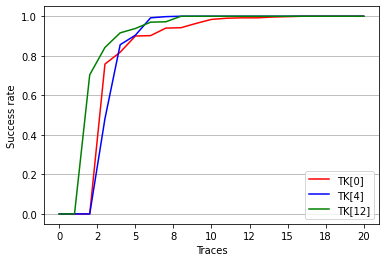

In [8]:
succes_rate_0.insert(0,0.0)
succes_rate_4.insert(0,0.0)
succes_rate_12.insert(0,0.0)
plt.figure()
plt.ylabel('Success rate')
plt.xlabel('Traces')
plt.plot(np.array(succes_rate_0), label="TK[0]", c="red")
plt.plot(np.array(succes_rate_4), label="TK[4]", c="blue")
plt.plot(np.array(succes_rate_12), label="TK[12]", c="green")

plt.grid(axis='y')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
plt.legend()
plt.draw()
plt.savefig("std_attacks_compared.png")